In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np

#For datavisualiztion
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


import warnings
warnings.filterwarnings('ignore')
# For model prepration
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler


In [ ]:
#Import the Data

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/wine.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [ ]:
#See Data Summary

In [ ]:
data.shape

(1599, 13)

In [ ]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

In [ ]:
#There is no null values we are good to proceed

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


As we hvae categorical column(Alcohol_content) we  need to convert into numeric data using encoding method.



Content is following same like low medium high . we need to give weight according to the order .

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
df=OrdinalEncoder(categories=[['Low','Medium','High']])
df1=df.fit_transform(data[['Alcohol_content']])
df1

array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

Override alcohol content column with codes . Now we are infuse the original data. and convert data transformation we are reassigning the data in the same column.

In [ ]:
data['Alcohol_content']=df1

Then we are going to check relationship and multicollinearity problem.

In Machine learning there is not fixed method , there is no standard.



If everything is stardized if everything is pre defined . every company they will atomat everything . if everything is fix company dont need data scientist.

Why Dont need - > Beacuse only human and see tha data and analyse it machine  working based on ours intruction

- Still we are not started to check relationship.

# Plotting Heatmap (Correaltion Matrix)

- Lets try to see . if we can reduce the features using different tehniques.

- Lets plot heatmap to visualize and find the coefficient of multicollinearity.

In [ ]:
df_corr=data.corr().abs()# (ab But we need proof.solute value)This code will get the coefficient of one varible vs all other variable(Relationship)

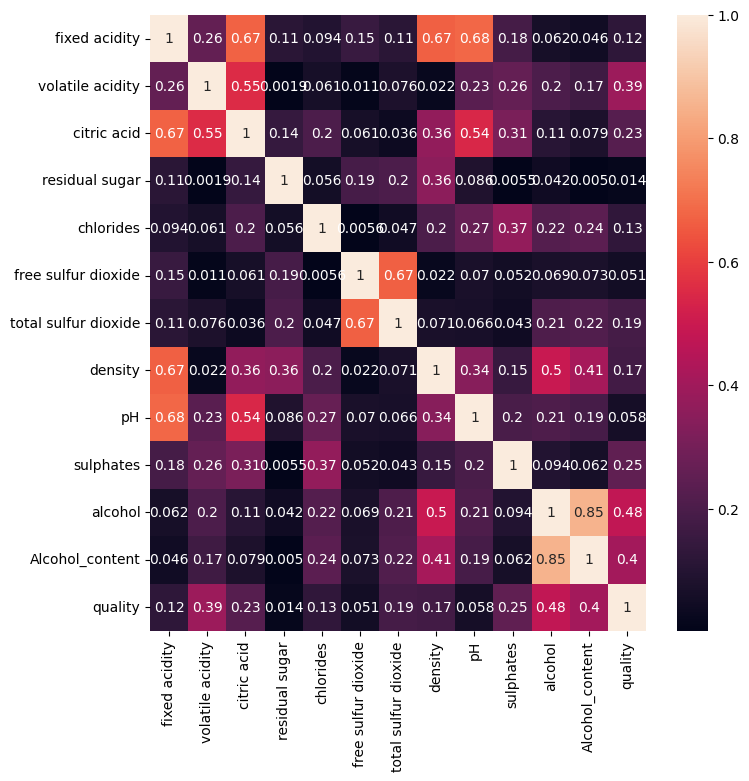

In [ ]:
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

Seems like alcohol_content and alcohol are correlated as per above heat map. But we need proof.

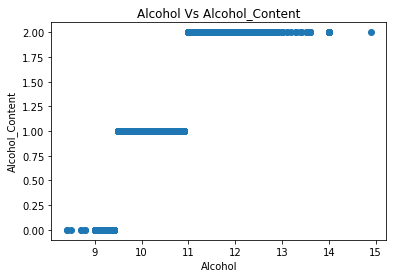

In [ ]:
plt.scatter(data.alcohol,data.Alcohol_content)
plt.xlabel('Alcohol')
plt.ylabel('Alcohol_Content')
plt.title('Alcohol Vs Alcohol_Content')
plt.show()

We see clear trend . As and when alcohol level increases its content also increasing . so we can delete one of them.

So take your academic example :- So when i am training you in your college in that time we are give question and we will also give answer so you are going to get trained . That all you learn I am going to give question as well as answer and i am teaching you .

But when i am testing you i will give only question , I dont give you answer . i will hide the answer.

I will give you question for model testing or prediction it will going to predict label.

In [ ]:
# Let's prepare the data for modeling by removing the 'Alcohol_content' feature from the predictors and setting 'quality' as the target variable.
x = data.drop(columns=['Alcohol_content', 'quality'])
y = data.quality


In [ ]:
#Lets split the data into a train test spli
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=94255)

Here we are not going to use Standard Scaler because decision tree will take care of that you dont need to standadize the data in the decision tree.

In [ ]:
#Write function and call as many times to check accuaracy_score of different models

In [ ]:
def metrics_score(cnn,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=cnn.predict(x_train)
        print("==================Training Score=================")
        print("Accuracy Score == >  ", accuracy_score(y_train,y_pred)*100)
    elif train==False:
        pred=cnn.predict(x_test)
        print("=================Test Score======================")
        print("Accuracy Score===>  ",accuracy_score(y_test,pred)*100)
        print("Classification Report==>",classification_report(y_test,pred))


In [ ]:
#Intiate DecisionTressClassifier with new parameter and train

cnn=DecisionTreeClassifier()

In [ ]:
#Traib the model
cnn.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
#Call the function and pass dataset to check train and test score
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

==================Training Score=================
Accuracy Score == >   100.0
=================Test Score======================
Accuracy Score===>   60.5
Classification Report==>               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        11
           5       0.66      0.73      0.69       166
           6       0.62      0.56      0.59       160
           7       0.52      0.56      0.54        57
           8       0.00      0.00      0.00         5

    accuracy                           0.60       400
   macro avg       0.30      0.31      0.30       400
weighted avg       0.60      0.60      0.60       400



In [ ]:
#We are tuning four important hyperparameter right now, we are passing the different values for both paramters.


grid_param={
    'criterion':['ginni','entropy'],
    'max_depth': range(10,15),# The Maximum depth of the tree
    'min_samples_leaf':range(2,6),#The maximum number of samples required to be at a leaf node
    'min_samples_split':range(3,8),#The minimum numbers of sample required to split an internal node
    'max_leaf_nodes':range(5,10)}#Best nodes are defined as them unlimited number of leaf nodes

#criterian

In [ ]:
grid_search=GridSearchCV(estimator=cnn,
                         param_grid=grid_param,
                         cv=5,
                        n_jobs=-1)#use all the cores in your system for performance improvement .


In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [ ]:
best_parameter=grid_search.best_params_
print(best_parameter)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [ ]:
#Initiate DecisionTreeClassifier with new parameter and train.

cnn=DecisionTreeClassifier(criterion='entropy',max_depth=10,max_leaf_nodes=9,min_samples_split= 3)

In [ ]:
#Train the model
cnn.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=9,
                       min_samples_split=3)

In [ ]:
#Call the function and pass dataset to check train and test score
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

==================Training Score=================
Accuracy Score == >   60.80066722268557
=================Test Score======================
Accuracy Score===>   56.99999999999999
Classification Report==>               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        11
           5       0.69      0.65      0.67       166
           6       0.52      0.62      0.56       160
           7       0.49      0.37      0.42        57
           8       0.00      0.00      0.00         5

    accuracy                           0.57       400
   macro avg       0.28      0.27      0.28       400
weighted avg       0.56      0.57      0.56       400

